In [6]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
print('Libraries imported.')

Libraries imported.


In [7]:
# Read in the data

df = pd.read_csv(r'C:\Users\John K\Documents\Portfolio Projects\movies.csv')
print("csv file read into Dataframe.")

csv file read into Dataframe.


In [8]:
# Quick review of data to make sure it was properly imported.

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [9]:
# Review dataframe to determine if there is any missing data.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [10]:
# Data types for columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [11]:
# Data cleaning - Changing dtypes of columns to remove unnecessary decimal place

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [12]:
# Creating new "year_of_release" column to make sure "released" and "year" contain the same year.

df['year_of_release'] = df['released'].astype(str).str[:4]

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_of_release
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016,2016


In [13]:
# Sorting the dataframe by "gross" in descending order

df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_of_release
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter N�ss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


In [14]:
# Checking unique values in "company" column

df['company'].drop_duplicates().sort_values(ascending=False)

5288                        micro_scope
3486                           i5 Films
6084                               erbp
3225                     double A Films
2707        Zucker Brothers Productions
                     ...               
3527                          120 Films
5466              10th Hole Productions
2815                 101st Street Films
3208                 1+2 Seisaku Iinkai
3832    "DIA" Productions GmbH & Co. KG
Name: company, Length: 2179, dtype: object

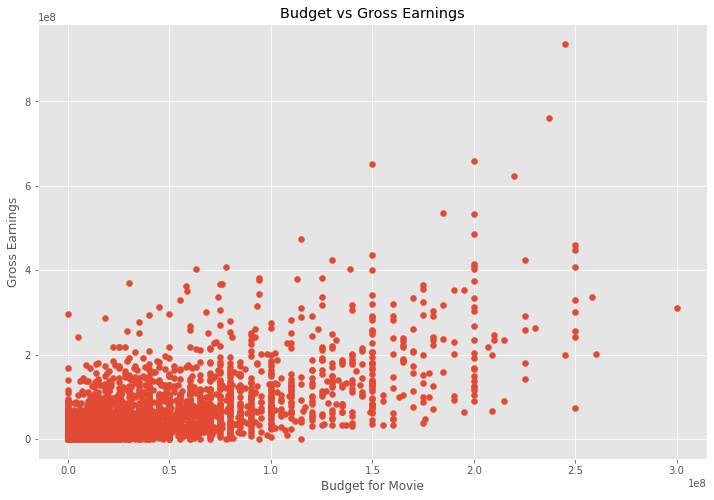

In [17]:
# Scatter plot with budget vs. gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Movie')
plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

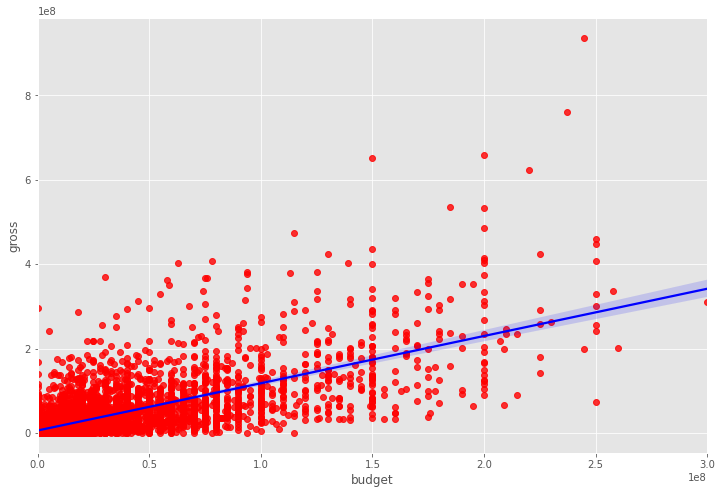

In [20]:
# Regression Plot: budget vs gross 

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [22]:
# Finding the correlation between budget and gross

df.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


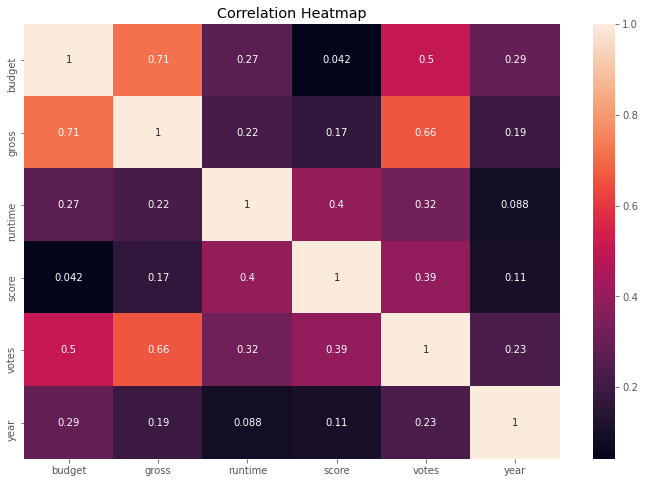

In [25]:
# Observing a high correlation between budget and gross
# PLotting heatmap to better visualize this correlation

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')

plt.show()

In [27]:
# Convert string values in columns to later check correlation between them.

df_numeric = df

for col_name in df_numeric.columns:
    if(df_numeric[col_name].dtype == 'object'):
        df_numeric[col_name] = df_numeric[col_name].astype('category')
        df_numeric[col_name] = df_numeric[col_name].cat.codes
        
df_numeric.sort_values(by=['gross'], inplace=False, ascending=False) # sorted by budget descending

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_of_release
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,29
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,23
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,11
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,29
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,2171,35,2071,0,547,2577,8,2059,104,7.2,748,16609,2981,2012,27
5699,0,1262,53,2385,4,542,5204,6,1977,89,6.2,1335,9018,2903,2011,26
6066,0,631,54,2484,5,441,2459,8,2125,106,5.7,1047,21070,2901,2013,28
2594,15000000,764,54,883,4,309,6257,7,895,84,5.7,2459,5034,217,1997,11


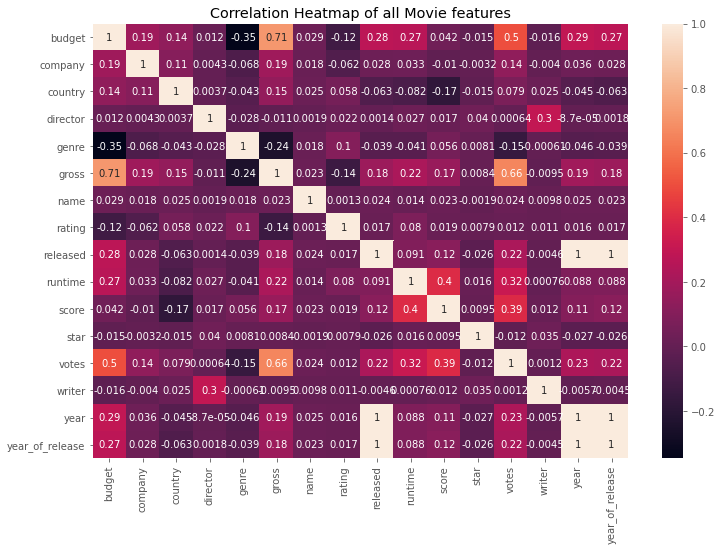

In [29]:
correlation_matrix2 = df_numeric.corr()

sns.heatmap(correlation_matrix2, annot=True)
plt.title('Correlation Heatmap of all Movie features')

plt.show()

In [30]:
df_numeric.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_of_release
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015062,0.503924,-0.015611,0.291009,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272,0.028012
country,0.137635,0.107950,1.000000,0.003699,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014569,0.078657,0.024982,-0.045204,-0.062707
director,0.011602,0.004320,0.003699,1.000000,-0.027669,-0.011429,0.001906,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000087,0.001823
genre,-0.346794,-0.068330,-0.042793,-0.027669,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259,-0.039014
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.178564,0.224579,0.165693,0.008381,0.662457,-0.009455,0.191548,0.176879
name,0.028712,0.018098,0.025020,0.001906,0.018062,0.022768,1.000000,0.001289,0.024120,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024624,0.023411
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001289,1.000000,0.016696,0.079542,0.019271,0.007891,0.011678,0.010741,0.016221,0.017438
released,0.276635,0.027898,-0.062609,0.001440,-0.039179,0.178564,0.024120,0.016696,1.000000,0.091102,0.119577,-0.025506,0.221736,-0.004634,0.996187,0.999389
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.091102,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639,0.088342


In [31]:
correlation_mat = df_numeric.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget           budget             1.000000
                 company            0.187205
                 country            0.137635
                 director           0.011602
                 genre             -0.346794
                                      ...   
year_of_release  star              -0.026052
                 votes              0.220797
                 writer            -0.004546
                 year               0.996229
                 year_of_release    1.000000
Length: 256, dtype: float64

In [33]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre            budget            -0.346794
budget           genre             -0.346794
gross            genre             -0.242676
genre            gross             -0.242676
score            country           -0.174414
                                      ...   
director         director           1.000000
country          country            1.000000
company          company            1.000000
year             year               1.000000
year_of_release  year_of_release    1.000000
Length: 256, dtype: float64

In [34]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes            budget             0.503924
budget           votes              0.503924
votes            gross              0.662457
gross            votes              0.662457
                 budget             0.712196
budget           gross              0.712196
released         year               0.996187
year             released           0.996187
year_of_release  year               0.996229
year             year_of_release    0.996229
year_of_release  released           0.999389
released         year_of_release    0.999389
budget           budget             1.000000
writer           writer             1.000000
votes            votes              1.000000
star             star               1.000000
score            score              1.000000
runtime          runtime            1.000000
released         released           1.000000
rating           rating             1.000000
name             name               1.000000
gross            gross              1.000000
genre     

In [ ]:
# Votes and budget have the highest correlation to gross earnings
# Company has low correlation